In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error


In [138]:
df=pd.read_csv('/home/rgukt/Downloads/archive (4)/car_price_dataset.csv')

In [139]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [141]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [142]:
numerical_columns=list(df.describe().columns)

In [143]:
numerical_columns

['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']

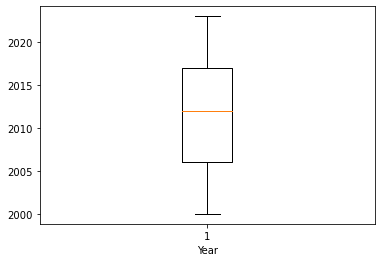

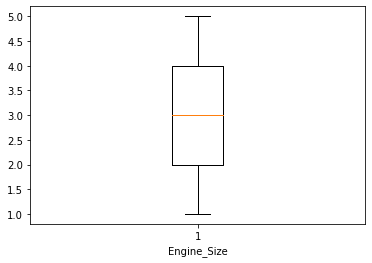

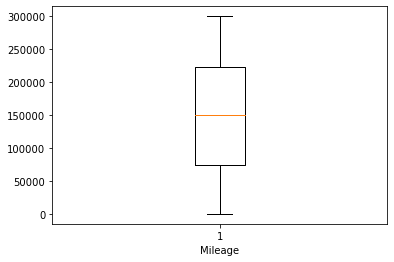

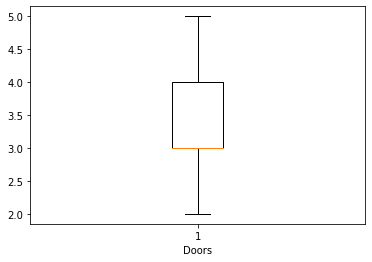

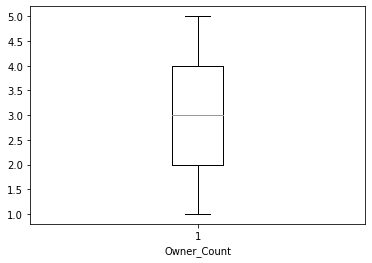

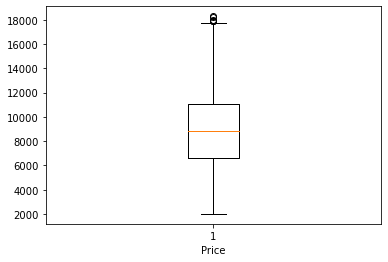

In [144]:
for i in numerical_columns:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [145]:
def fun(column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    q2=df[column].median()
    iqr=q3-q1
    min=q1-iqr*1.5
    maxi=q3+iqr*1.5
    print(min,maxi)
    return [min,maxi]


In [146]:
for i in numerical_columns:
    k=fun([i])
   
    

Year    1989.5
dtype: float64 Year    2033.5
dtype: float64
Engine_Size   -1.0
dtype: float64 Engine_Size    7.0
dtype: float64
Mileage   -148743.125
dtype: float64 Mileage    446969.875
dtype: float64
Doors    1.5
dtype: float64 Doors    5.5
dtype: float64
Owner_Count   -1.0
dtype: float64 Owner_Count    7.0
dtype: float64
Price   -14.75
dtype: float64 Price    17747.25
dtype: float64


In [147]:

df[~((df['Price'] < -14.75) | (df['Price'] > 17747.25))]


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [148]:
df['Brand'].unique()

array(['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', 'Toyota',
       'Honda', 'BMW', 'Hyundai', 'Ford'], dtype=object)

In [149]:
from sklearn.preprocessing import LabelEncoder

In [150]:
le=LabelEncoder()
df['Brand']=le.fit_transform(df['Brand'])

In [151]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,2,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,7,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,0,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,9,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,6,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,2,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,1,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,3,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [152]:
df['Model'].unique()

array(['Rio', 'Malibu', 'GLA', 'Q5', 'Golf', 'Camry', 'Civic', 'Sportage',
       'RAV4', '5 Series', 'CR-V', 'Elantra', 'Tiguan', 'Equinox',
       'Explorer', 'A3', '3 Series', 'Tucson', 'Passat', 'Impala',
       'Corolla', 'Optima', 'Fiesta', 'A4', 'Focus', 'E-Class', 'Sonata',
       'C-Class', 'X5', 'Accord'], dtype=object)

In [153]:
df['Model']=le.fit_transform(df['Model'])

In [154]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
Fuel_Type=ohe.fit_transform(df[['Fuel_Type']])



In [155]:
Fuel_Type_df=pd.DataFrame(Fuel_Type,columns=ohe.get_feature_names_out(['Fuel_Type']))

In [157]:
Fuel_Type_df

,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
9995,1.0,0.0,0.0,0.0
9996,0.0,1.0,0.0,0.0
9997,0.0,0.0,0.0,1.0
9998,0.0,0.0,1.0,0.0


In [165]:
df=pd.concat([df,Fuel_Type_df],axis=1)


In [163]:

df.drop('Fuel_Type',axis=1, inplace=True)

In [166]:
df

,Brand,Model,Year,Engine_Size,Transmission,Mileage,Doors,Owner_Count,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol
0,6,24,2020,4.2,Manual,289944,3,5,8501,1.0,0.0,0.0,0.0
1,2,19,2012,2.0,Automatic,5356,2,3,12092,0.0,0.0,1.0,0.0
2,7,16,2020,4.2,Automatic,231440,4,2,11171,1.0,0.0,0.0,0.0
3,0,22,2023,2.0,Manual,160971,2,1,11780,0.0,1.0,0.0,0.0
4,9,17,2003,2.6,Semi-Automatic,286618,3,3,2867,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,20,2004,3.7,Semi-Automatic,5794,2,4,8884,1.0,0.0,0.0,0.0
9996,2,18,2002,1.4,Automatic,168000,2,1,6240,0.0,1.0,0.0,0.0
9997,1,0,2010,3.0,Automatic,86664,5,1,9866,0.0,0.0,0.0,1.0
9998,3,13,2002,1.4,Automatic,225772,4,1,4084,0.0,0.0,1.0,0.0


In [168]:
df['Transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Automatic'], dtype=object)

In [170]:
Transmission=ohe.fit_transform(df[['Transmission']])

In [174]:
Transmission_df=pd.DataFrame(Transmission,columns=ohe.get_feature_names_out(['Transmission']))

In [175]:
df.drop('Transmission',axis=1,inplace=True)

In [178]:
df=pd.concat([df,Transmission_df],axis=1)

In [179]:
df

,Brand,Model,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,6,24,2020,4.2,289944,3,5,8501,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,19,2012,2.0,5356,2,3,12092,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,7,16,2020,4.2,231440,4,2,11171,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,22,2023,2.0,160971,2,1,11780,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,9,17,2003,2.6,286618,3,3,2867,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,20,2004,3.7,5794,2,4,8884,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9996,2,18,2002,1.4,168000,2,1,6240,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9997,1,0,2010,3.0,86664,5,1,9866,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9998,3,13,2002,1.4,225772,4,1,4084,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [182]:
Y=df['Price']

In [183]:
df.drop('Price',axis=1,inplace=True)

In [184]:
df

,Brand,Model,Year,Engine_Size,Mileage,Doors,Owner_Count,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,6,24,2020,4.2,289944,3,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,19,2012,2.0,5356,2,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,7,16,2020,4.2,231440,4,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,22,2023,2.0,160971,2,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,9,17,2003,2.6,286618,3,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,20,2004,3.7,5794,2,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9996,2,18,2002,1.4,168000,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9997,1,0,2010,3.0,86664,5,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9998,3,13,2002,1.4,225772,4,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [185]:
X=df

In [188]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [189]:
model=RandomForestRegressor()

In [190]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [193]:
Y_predict=model.predict(X_test)

In [194]:
result_Data=pd.DataFrame(Y_predict,Y_test)

In [196]:
result_Data

,0
Price,
2000,2213.35
11164,11166.54
14630,13433.89
7334,7414.35
10127,10479.52
...,...
4681,4653.19
12839,12723.14
8124,8493.72


In [202]:
print('r2_Score',r2_score(Y_predict,Y_test))
print('mae',mean_absolute_error(Y_predict,Y_test))
print('mqe',mean_squared_error(Y_predict,Y_test))

r2_Score 0.9870597129484201
mae 260.94862
mqe 111267.23188659998
